# POLYNOMIAL REGRESSION

## Now, linear regression is used when we assume relationship is linear but we need their exists non-linear relationship we use polynomial regression. 
## Here are some reasons to use polynomial regression instead of linear regression:
## -Nonlinear relationships: If the relationship between the variables is better represented by a curve or a polynomial function, polynomial regression can provide a better fit to the data. Linear regression would be limited in capturing such nonlinear patterns.
## -Flexibility: Polynomial regression allows for greater flexibility in modeling the data. By including higher-order terms (e.g., x^2, x^3, etc.) in the regression equation, polynomial regression can capture more intricate relationships between the variables.
## -Improved accuracy: In situations where the data exhibits a curved relationship, using polynomial regression can yield more accurate predictions compared to linear regression. By fitting a curve to the data points, the model can better account for the variations in the data.
## -Polynomial features: Even if the underlying relationship is approximately linear, transforming the original features into polynomial features can help capture higher-order interactions and improve the model's performance. In such cases, polynomial regression serves as a way to enhance a linear regression model.
## In polynomial regression, the independent variable(s) are raised to various powers to create additional features. For example, if we have a single independent variable x, a polynomial regression of degree 2 would include terms like x, x^2, and a constant term. The model equation would be:
# y = b0 + b1x + b2x^2

## Here, y represents the dependent variable, and b0, b1, and b2 are the coefficients to be estimated. The model estimates these coefficients to fit the polynomial curve that best fits the data.
## The polynomial regression equation with 3 independent variables of degree 2 is:
## y = a0 + a1x1 + a2x1^2 + a3x2 + a4x2^2 + a5x3 + a6x3^2
## where:
## -y is the dependent variable
## -x1, x2, and x3 are the independent variables
## -a0, a1, a2, a3, a4, and a5 are the coefficients





In [1]:
## Let's implement Polynomial Regerssion


In [2]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression,SGDRegressor

from sklearn.preprocessing import PolynomialFeatures,StandardScaler

from sklearn.metrics import r2_score

from sklearn.pipeline import Pipeline

In [3]:
X = 6 * np.random.rand(200, 1) - 3
y = 0.8 * X**2 + 0.9 * X + 2 + np.random.randn(200, 1)

# y = 0.8x^2 + 0.9x + 2
## We are generating our own data

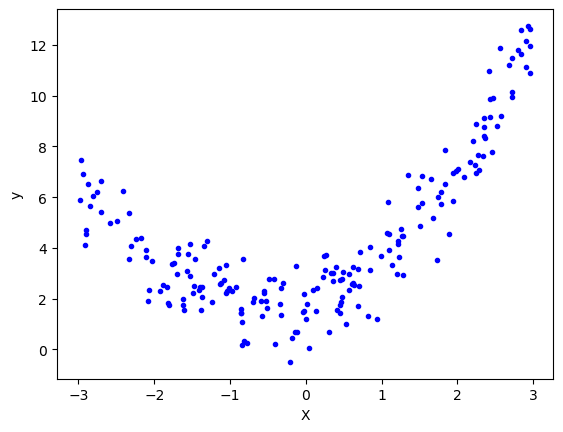

In [4]:
plt.plot(X, y,'b.')
plt.xlabel("X")
plt.ylabel("y")
plt.show()

In [5]:
# Train test split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [6]:
# Let's try with linear regression first
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [7]:
y_pred = lr.predict(X_test)
r2_score(y_test,y_pred)

0.38246660283599043

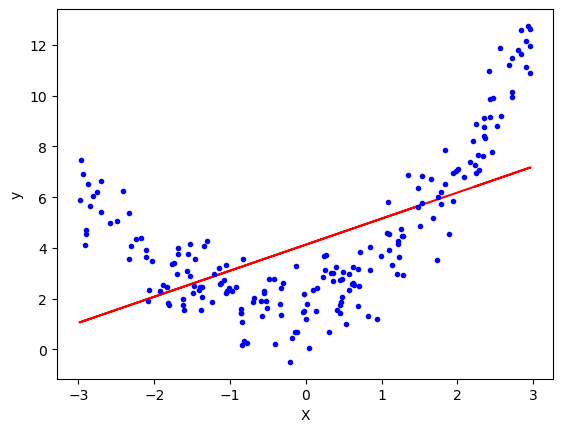

In [8]:
plt.plot(X_train,lr.predict(X_train),color='r')
plt.plot(X, y, "b.")
plt.xlabel("X")
plt.ylabel("y")
plt.show()

In [9]:
# Now let's use polynomial Regression!!
poly = PolynomialFeatures(degree=2,include_bias=True)

X_train_trans = poly.fit_transform(X_train)
X_test_trans = poly.transform(X_test)

In [10]:
print(X_train[0])
print(X_train_trans[0]) # this have 3 parameters x^0 x^1 and x^2 as we have degree two
# Always remeber we apply polynomial feture only in input

[1.53383858]
[1.         1.53383858 2.3526608 ]


In [11]:
lr = LinearRegression()
lr.fit(X_train_trans,y_train)

LinearRegression()

In [12]:
y_pred = lr.predict(X_test_trans)

In [13]:
r2_score(y_test,y_pred)

0.9420704695873765

In [14]:
print(lr.coef_) # three coeff
print(lr.intercept_)

[[0.         0.89641987 0.84060317]]
[1.90713604]


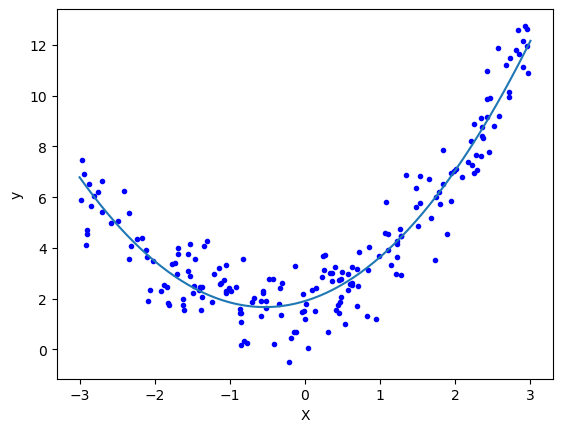

In [24]:
X_new=np.linspace(-3, 3, 200).reshape(200, 1)
X_new_poly = poly.transform(X_new)
y_new = lr.predict(X_new_poly)
plt.plot(X, y, "b.")
plt.plot(X_new, y_new )
plt.xlabel("X")
plt.ylabel("y")
plt.show()

In [25]:
poly.powers_

array([[0],
       [1],
       [2]], dtype=int64)

# Bias and Variance ?

## The bias-variance trade-off is a fundamental concept in machine learning that deals with the relationship between the model's ability to capture the underlying patterns in the data (bias) and its sensitivity to variations and noise in the data (variance).

## In machine learning we define bias as the inability of a machine learning model to truly capture the reltionship in the training data. The bias is known as the difference between the prediction of the values by the ML model and the correct value. Being high in biasing gives a large error in training as well as testing data. Its recommended that an algorithm should always be low biased to avoid the problem of underfitting.By high bias, the data predicted is in a straight line format, thus not fitting accurately in the data in the data set. Such fitting is known as Underfitting of Data. This happens when the hypothesis is too simple or linear in nature. 

## The variability of model prediction for a given data point which tells us spread of our data is called the variance of the model. The model with high variance has a very complex fit to the training data and thus is not able to fit accurately on the data which it hasn’t seen before. As a result, such models perform very well on training data but has high error rates on test data.When a model is high on variance, it is then said to as Overfitting of Data. Overfitting is fitting the training set accurately via complex curve and high order hypothesis but is not the solution as the error with unseen data is high.While training a data model variance should be kept low.

# Overfitting and Underfitting :)

## Overfitting is a phenomenon in machine learning in which a model learns the training data too well and as a result, it does not generalize well to new data. This can happen when the model is too complex or when the training data is not representative of the real world.Overfitting can be identified by looking at the model's performance on the training data and the test data. If the model performs much better on the training data than on the test data, then it is likely overfitting.There are a number of techniques that can be used to prevent overfitting, such as:

## -Regularization: Regularization is a technique that penalizes the model for complexity. This can help to reduce the variance of the model, while still allowing it to capture the important regularities in the data.
## -Cross-validation: Cross-validation is a technique that can be used to evaluate the performance of a model on unseen data. This can help to identify models that are overfitting the training data, and can be used to select a model with a good bias–variance tradeoff.
## -Data augmentation: Data augmentation is a technique that can be used to increase the size of the training dataset. This can help to reduce the variance of the model, while still allowing it to capture the important regularities in the data.

## Underfitting is a phenomenon in machine learning in which a model does not learn the training data well enough and as a result, it does not generalize well to new data. This can happen when the model is too simple or when the training data is not representative of the real world.Underfitting can be identified by looking at the model's performance on the training data and the test data. If the model performs much worse on the test data than on the training data, then it is likely underfitting.

## There are a number of techniques that can be used to prevent underfitting, such as:

## -Increasing the complexity of the model: This can be done by adding more features to the model or by using a more complex model architecture.
## -Increasing the size of the training dataset: This can help the model to learn the patterns in the data more accurately.
## -Using regularization: Regularization is a technique that penalizes the model for complexity. This can help to reduce the variance of the model, while still allowing it to capture the important regularities in the data.
## Our goal is low variance and low bias!!


# Bias- Variance Trade-off
## If the algorithm is too simple (hypothesis with linear eq.) then it may be on high bias and low variance condition and thus is error-prone. If algorithms fit too complex ( hypothesis with high degree eq.) then it may be on high variance and low bias. In the latter condition, the new entries will not perform well. Well, there is something between both of these conditions, known as Trade-off or Bias Variance Trade-off.

## This tradeoff in complexity is why there is a tradeoff between bias and variance. An algorithm can’t be more complex and less complex at the same time. 


## The bias-variance trade-off is a fundamental concept in machine learning that deals with the relationship between the model's ability to capture the underlying patterns in the data (bias) and its sensitivity to variations and noise in the data (variance).

## The techniques used for Bias-Variance Tade Off:
## 1. Bagging 
## 2. Boosting
## 3. Regulariztion 
## 4. Cross-Validation
## 5. Data Augmentation

## Let's start with Regularization

## Regularization is a technique used in machine learning to reduce the complexity of a model and prevent overfitting. Overfitting occurs when a model learns the training data too well and as a result, it does not generalize well to new data. Regularization can be done by adding a penalty term to the loss function. The penalty term is typically proportional to the complexity of the model. This helps to reduce the variance of the model, while still allowing it to capture the important regularities in the data.

## There are several types of regularization techniques commonly used in machine learning to manage the bias-variance trade-off and prevent overfitting. The two main types of regularization are L1 or Lasso (Least AbsoluteShrinkage and Selection Operator)  regularization and L2 regularization (Ridge), but there are also other variants and techniques. Here are the types of regularization:

## -L1 Regularization (Lasso): L1 regularization adds a penalty term to the loss function that is proportional to the absolute values of the model's coefficients. It encourages sparsity by driving some coefficients to exactly zero, effectively performing feature selection. Lasso regularization can help in feature selection and produce models with a smaller number of relevant features.

## -L2 Regularization (Ridge): L2 regularization adds a penalty term to the loss function that is proportional to the squared magnitudes of the model's coefficients. It encourages smaller coefficient values and prevents them from becoming too large. Ridge regularization helps in reducing the impact of irrelevant features and can improve the stability of the model.

## -Elastic Net Regularization: Elastic Net regularization combines both L1 and L2 regularization. It adds a penalty term that includes both the L1 and L2 norms of the coefficient values. Elastic Net regularization is useful when there are many correlated features in the dataset, as it can select groups of correlated features together while still allowing for individual feature selection.

## The regularization equation adds a penalty term to the original loss function in order to control the complexity of the model and avoid overfitting. There are two commonly used types of regularization: L1 regularization (Lasso) and L2 regularization (Ridge). Here's how the regularization term is incorporated into the loss function for each type:

## L1 Regularization (Lasso):The L1 regularization equation adds the sum of the absolute values of the model's coefficients multiplied by a regularization parameter lambda (λ). The loss function with L1 regularization is given by:

## Loss function = Original loss function + λ * (sum of absolute values of coefficients)

The Lasso Regression cost function can be written as:

Cost = RSS + λ * Σ|β|

Where:

RSS is the residual sum of squares, similar to Ridge Regression.
λ (lambda) is the regularization parameter, similar to Ridge Regression.
Σ|β| is the sum of the absolute values of the coefficients.


## The L1 regularization term encourages sparsity in the model, as it tends to drive some coefficients to exactly zero. This helps with feature selection and produces models with a smaller number of relevant features.

## L2 Regularization (Ridge):The L2 regularization equation adds the sum of the squared magnitudes of the model's coefficients multiplied by the regularization parameter lambda (λ). The loss function with L2 regularization is given by:

## Loss function = Original loss function + λ * (sum of squared magnitudes of coefficients)

The Ridge Regression cost function can be written as:

Cost = RSS (Residual Sum of Squares) + λ * Σ(β^2)

Where:

RSS is the residual sum of squares, which measures the sum of the squared differences between the actual target values and the predicted values.
λ (lambda) is the regularization parameter that controls the strength of the penalty term. It is a non-negative hyperparameter that needs to be tuned.
Σ(β^2) is the sum of squared coefficients, where β represents the regression coefficients.

## The L2 regularization term penalizes large coefficient values and encourages smaller coefficient magnitudes. It helps in reducing the impact of irrelevant features and improves the stability of the model.

## The choice of λ determines the strength of the regularization. A larger λ value leads to a stronger regularization effect, resulting in smaller coefficient values and a simpler model.

### Key difference between Lasso and Ridge?

Lasso Regression and Ridge Regression are both regularization techniques used in linear regression models to prevent overfitting and improve the model's performance. However, they differ in terms of the penalty term used and the type of regularization they impose on the coefficients.

Here are the key differences between Lasso and Ridge Regression:

* Penalty Term:
1. Lasso Regression (L1 regularization): Lasso adds a penalty term to the loss function that is proportional to the sum of the absolute values of the coefficients (β). The penalty term is represented as λ * Σ|β|. This penalty term encourages sparsity in the coefficients, allowing some coefficients to become exactly zero. As a result, Lasso can perform feature selection by automatically identifying and excluding irrelevant or redundant features.
2. Ridge Regression (L2 regularization): Ridge adds a penalty term to the loss function that is proportional to the sum of the squared values of the coefficients (β). The penalty term is represented as λ * Σ(β^2). This penalty term encourages small coefficients without forcing them to be exactly zero. Ridge reduces the impact of less important features but does not perform feature selection like Lasso.

* Impact on Coefficients:
1. Lasso Regression: Lasso tends to shrink the coefficients of less important features to zero, effectively performing feature selection. This results in a sparse model where only a subset of features contributes significantly to the predictions, making it easier to interpret.
2. Ridge Regression: Ridge shrinks the coefficients of less important features towards zero but does not force them to be exactly zero. All features contribute to the predictions, although those with less importance have smaller coefficients. Ridge does not inherently perform feature selection but rather helps to mitigate the impact of irrelevant or highly correlated features.

* Regularization Strength:
1. Lasso Regression: The regularization strength is controlled by the λ (lambda) parameter. Higher values of λ result in stronger regularization and sparser models.
2. Ridge Regression: Similar to Lasso, the regularization strength is controlled by the λ parameter. However, Ridge is less likely to drive coefficients to exactly zero due to the squared penalty term.

* Bias-Variance Trade-off:
1. Lasso Regression: Lasso can lead to a higher bias because it tends to exclude some features completely, potentially missing out on useful information. It is useful when the dataset has many irrelevant features and a sparse solution is desired.
2. Ridge Regression: Ridge strikes a balance between bias and variance, shrinking coefficients while maintaining their non-zero values. It is effective when the dataset has multicollinearity (highly correlated features) and aims to reduce the impact of collinearity on the model's stability.

In summary, Lasso and Ridge Regression differ in the type of penalty term used and the impact on the coefficients. 

# IMPLEMENT RIDGE REGRESSION

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes

In [2]:
data=load_diabetes()

In [3]:
X=data.data
y=data.target

In [4]:
X

array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
         0.01990749, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
        -0.06833155, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
         0.00286131, -0.02593034],
       ...,
       [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
        -0.04688253,  0.01549073],
       [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
         0.04452873, -0.02593034],
       [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
        -0.00422151,  0.00306441]])

In [5]:
y

array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
        69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
        68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
        87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
       259.,  53., 190., 142.,  75., 142., 155., 225.,  59., 104., 182.,
       128.,  52.,  37., 170., 170.,  61., 144.,  52., 128.,  71., 163.,
       150.,  97., 160., 178.,  48., 270., 202., 111.,  85.,  42., 170.,
       200., 252., 113., 143.,  51.,  52., 210.,  65., 141.,  55., 134.,
        42., 111.,  98., 164.,  48.,  96.,  90., 162., 150., 279.,  92.,
        83., 128., 102., 302., 198.,  95.,  53., 134., 144., 232.,  81.,
       104.,  59., 246., 297., 258., 229., 275., 281., 179., 200., 200.,
       173., 180.,  84., 121., 161.,  99., 109., 115., 268., 274., 158.,
       107.,  83., 103., 272.,  85., 280., 336., 281., 118., 317., 235.,
        60., 174., 259., 178., 128.,  96., 126., 28

In [6]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=45)
from sklearn.linear_model import LinearRegression
L=LinearRegression()

In [7]:
L.fit(X_train,y_train)

LinearRegression()

In [8]:
print(L.coef_)
print(L.intercept_)

[  23.45465406 -247.42747406  492.1087518   329.35876431 -970.79723039
  573.54295519  182.42162368  255.92168168  794.21609282   89.32249214]
152.13623331746496


In [9]:
y_pred=L.predict(X_test)

In [10]:
from sklearn.metrics import r2_score,mean_squared_error

print("R2 score",r2_score(y_test,y_pred))
print("RMSE",np.sqrt(mean_squared_error(y_test,y_pred)))

R2 score 0.5188113124539246
RMSE 48.727137609532534


In [11]:
from sklearn.linear_model import Ridge
R=Ridge(alpha=0.0001)

In [12]:
R.fit(X_train,y_train)

Ridge(alpha=0.0001)

In [18]:
print(R.coef_)
print(R.intercept_)

[  23.51763492 -247.31766656  492.28244914  329.3317593  -957.46324421
  562.90310325  176.71070198  254.47033329  789.10867561   89.41375823]
152.13492030963658


In [19]:
print(R.coef_)
print(R.intercept_)

[  23.51763492 -247.31766656  492.28244914  329.3317593  -957.46324421
  562.90310325  176.71070198  254.47033329  789.10867561   89.41375823]
152.13492030963658


In [20]:
y_pred1=R.predict(X_test)

In [21]:
print("R2 score",r2_score(y_test,y_pred1))
print("RMSE",np.sqrt(mean_squared_error(y_test,y_pred1)))

R2 score 0.5189732635884962
RMSE 48.7189370018195


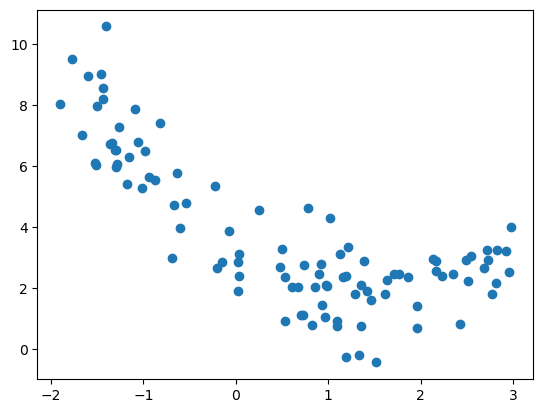

In [23]:
m = 100
x1 = 5 * np.random.rand(m, 1) - 2
x2 = 0.7 * x1 ** 2 - 2 * x1 + 3 + np.random.randn(m, 1)

plt.scatter(x1, x2)
plt.show()

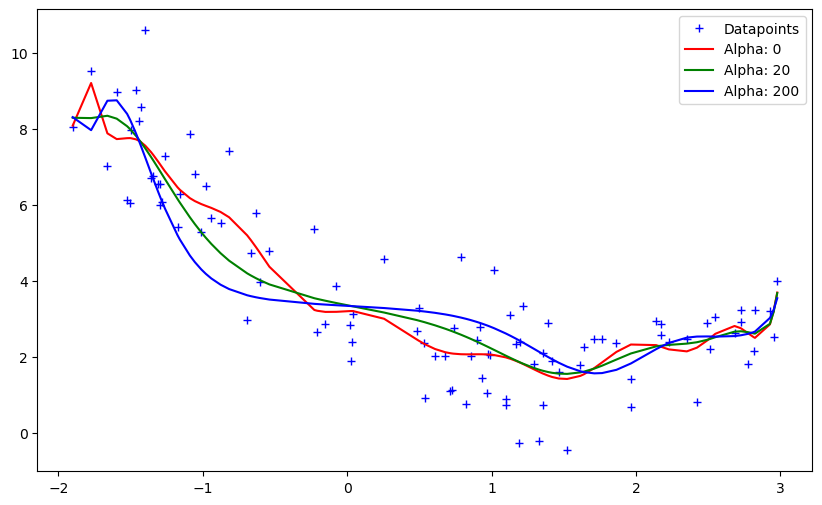

In [24]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

def get_preds_ridge(x1, x2, alpha):
    model = Pipeline([
        ('poly_feats', PolynomialFeatures(degree=16)),
        ('ridge', Ridge(alpha=alpha))
    ])
    model.fit(x1, x2)
    return model.predict(x1)

alphas = [0, 20, 200]
cs = ['r', 'g', 'b']

plt.figure(figsize=(10, 6))
plt.plot(x1, x2, 'b+', label='Datapoints')

for alpha, c in zip(alphas, cs):
    preds = get_preds_ridge(x1, x2, alpha)
    # Plot
    plt.plot(sorted(x1[:, 0]), preds[np.argsort(x1[:, 0])], c, label='Alpha: {}'.format(alpha))
# red is overfitting 
# green optimum
# blue underfitting
plt.legend()
plt.show()

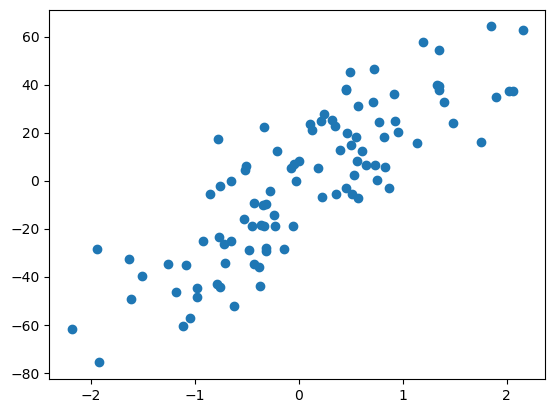

In [25]:
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt
import numpy as np
X,y = make_regression(n_samples=100, n_features=1, n_informative=1, n_targets=1,noise=20,random_state=13)
plt.scatter(X,y)

In [26]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X,y)
print(lr.coef_)
print(lr.intercept_)

[27.82809103]
-2.29474455867698


In [27]:
from sklearn.linear_model import Ridge
rr = Ridge(alpha=10)
rr.fit(X,y)
print(rr.coef_)
print(rr.intercept_)

[24.9546267]
-2.1269130035235726


In [28]:
rr1 = Ridge(alpha=100)
rr1.fit(X,y)
print(rr1.coef_)
print(rr1.intercept_)
[12.93442104]
-1.4248441496033308

[12.93442104]
-1.4248441496033308


-1.4248441496033308

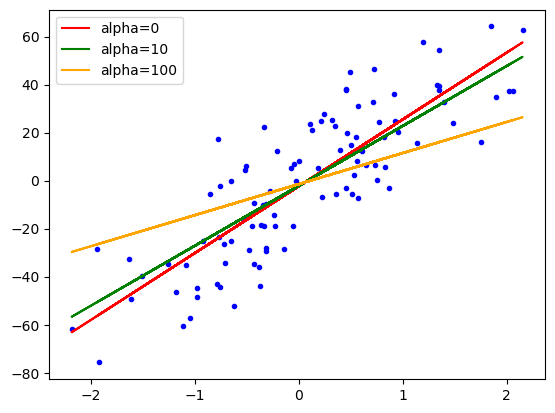

In [29]:
plt.plot(X,y,'b.')
plt.plot(X,lr.predict(X),color='red',label='alpha=0')
plt.plot(X,rr.predict(X),color='green',label='alpha=10')
plt.plot(X,rr1.predict(X),color='orange',label='alpha=100')
plt.legend()

In [30]:
def linear_regression(X,y,alpha=1):
    x_mean = X.mean()
    y_mean = y.mean()
    
    num = 0
    den = 0
    
    for i in range(X.shape[0]):
        num = num + (y[i] - y_mean) * (X[i] - x_mean)
        den = den + (X[i] - x_mean) * (X[i] - x_mean)
        
    m = num/(den + alpha)
    b = y_mean - m*x_mean
        
    return m,b

In [31]:
class MeraRidge:
    
    def __init__(self,alpha=0.1):
        self.alpha = alpha
        self.m = None
        self.b = None
        
    def fit(self,X_train,y_train):
        
        num = 0
        den = 0
        
        for i in range(X_train.shape[0]):
            num = num + (y_train[i] - y_train.mean())*(X_train[i] - X_train.mean())
            den = den + (X_train[i] - X_train.mean())*(X_train[i] - X_train.mean())
        
        self.m = num/(den + self.alpha)
        self.b = y_train.mean() - (self.m*X_train.mean())
        print(self.m,self.b)
    
    def predict(X_test):
        pass

In [32]:
reg = MeraRidge(alpha=100)

In [33]:
reg.fit(X,y)

[12.93442104] [-1.42484415]


## Ridge with gradient descent 

In [34]:
from sklearn.datasets import load_diabetes
from sklearn.metrics import r2_score
import numpy as np

In [35]:
X,y = load_diabetes(return_X_y=True)

In [36]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=4)

In [37]:
from sklearn.linear_model import SGDRegressor
reg = SGDRegressor(penalty='l2',max_iter=500,eta0=0.1,learning_rate='constant',alpha=0.001)

In [38]:
reg.fit(X_train,y_train)

y_pred = reg.predict(X_test)
print("R2 score",r2_score(y_test,y_pred))
print(reg.coef_)
print(reg.intercept_)

R2 score 0.46109625871592474
[  50.87105729 -167.53746223  376.49850728  271.06374709   -9.93529355
  -63.17745607 -168.83684916  135.6202224   340.01404212   92.64165459]
[159.35131339]


In [39]:
from sklearn.linear_model import Ridge

reg = Ridge(alpha=0.001, max_iter=500,solver='sparse_cg')

In [40]:
reg.fit(X_train,y_train)

y_pred = reg.predict(X_test)
print("R2 score",r2_score(y_test,y_pred))
print(reg.coef_)
print(reg.intercept_)

R2 score 0.4625010162119806
[  34.52193392 -290.84083334  482.40182542  368.06787745 -852.44871876
  501.59161632  180.11114653  270.76335659  759.73535927   37.49136676]
151.10198520390765


In [41]:
class MeraRidgeGD:
    
    def __init__(self,epochs,learning_rate,alpha):
        
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.alpha = alpha
        self.coef_ = None
        self.intercept_ = None
        
    def fit(self,X_train,y_train):
        
        self.coef_ = np.ones(X_train.shape[1])
        self.intercept_ = 0
        thetha = np.insert(self.coef_,0,self.intercept_)
        
        X_train = np.insert(X_train,0,1,axis=1)
        
        for i in range(self.epochs):
            thetha_der = np.dot(X_train.T,X_train).dot(thetha) - np.dot(X_train.T,y_train) + self.alpha*thetha
            thetha = thetha - self.learning_rate*thetha_der
        
        self.coef_ = thetha[1:]
        self.intercept_ = thetha[0]
    
    def predict(self,X_test):
        
        return np.dot(X_test,self.coef_) + self.intercept_

In [42]:
reg = MeraRidgeGD(epochs=500,alpha=0.001,learning_rate=0.005)

In [43]:
reg.fit(X_train,y_train)

y_pred = reg.predict(X_test)
print("R2 score",r2_score(y_test,y_pred))
print(reg.coef_)
print(reg.intercept_)

R2 score 0.47380182802609117
[  46.65050914 -221.3750037   452.12080647  325.54248128  -29.09464178
  -96.47517735 -190.90017011  146.32900372  400.80267299   95.09048094]
150.86975316713466


# 5 Key understanding - Ridge Regression
## 1. How the coefficients get effected?
## Lambda can vary from 0 to positive infinity. When lambda is 0 then no regularization only linear regression. If lambda value increases from 0 then coefficients shrinks towards zero but never zero 

In [47]:
from sklearn.datasets import load_diabetes

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
data = load_diabetes()
df = pd.DataFrame(data.data,columns=data.feature_names)
df['TARGET'] = data.target

In [45]:
df.head()

age       sex       bmi        bp        s1        s2        s3  \
0  0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1 -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2  0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356   
3 -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4  0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   

         s4        s5        s6  TARGET  
0 -0.002592  0.019907 -0.017646   151.0  
1 -0.039493 -0.068332 -0.092204    75.0  
2 -0.002592  0.002861 -0.025930   141.0  
3  0.034309  0.022688 -0.009362   206.0  
4 -0.002592 -0.031988 -0.046641   135.0

In [48]:
df.shape

(442, 11)

In [49]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(data.data,data.target,test_size=0.2,random_state=2)
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score

In [50]:
coefs = []
r2_scores = []

for i in [0,10,100,1000]:
    reg = Ridge(alpha=i)
    reg.fit(X_train,y_train)
    
    coefs.append(reg.coef_.tolist())
    y_pred = reg.predict(X_test)
    r2_scores.append(r2_score(y_test,y_pred))

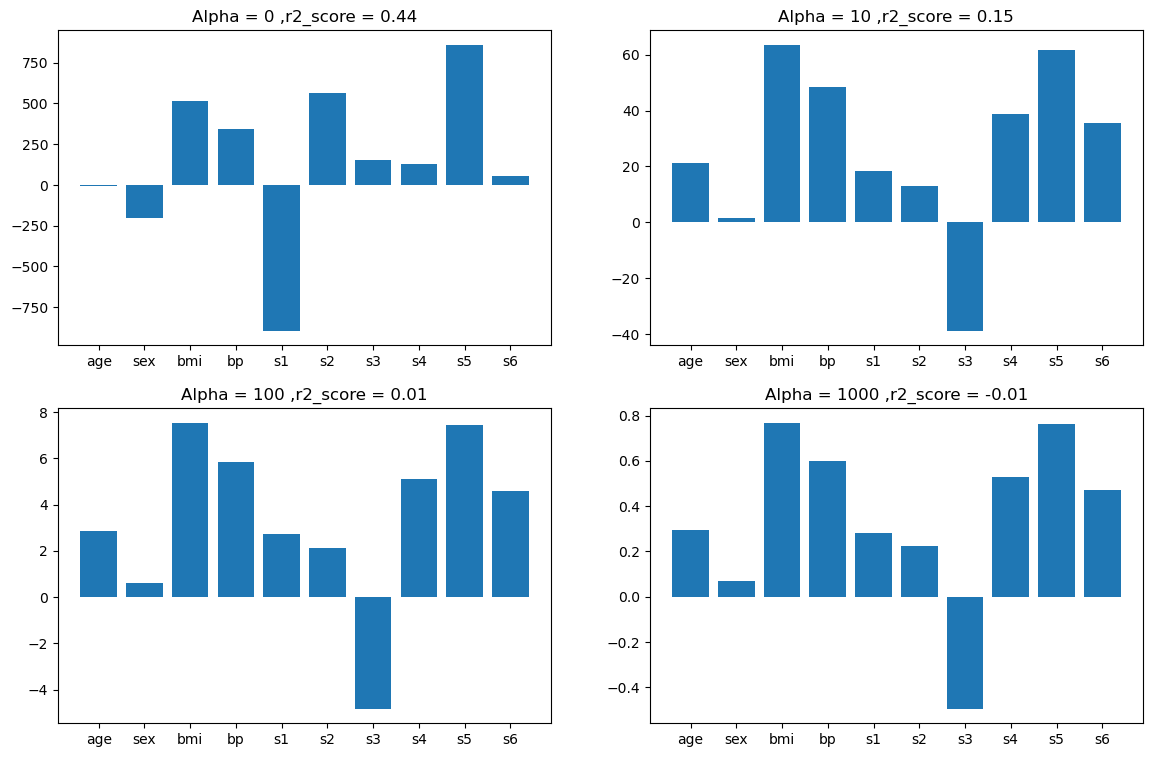

In [51]:
plt.figure(figsize=(14,9))
plt.subplot(221)
plt.bar(data.feature_names,coefs[0])
plt.title('Alpha = 0 ,r2_score = {}'.format(round(r2_scores[0],2)))

plt.subplot(222)
plt.bar(data.feature_names,coefs[1])
plt.title('Alpha = 10 ,r2_score = {}'.format(round(r2_scores[1],2)))

plt.subplot(223)
plt.bar(data.feature_names,coefs[2])
plt.title('Alpha = 100 ,r2_score = {}'.format(round(r2_scores[2],2)))

plt.subplot(224)
plt.bar(data.feature_names,coefs[3])
plt.title('Alpha = 1000 ,r2_score = {}'.format(round(r2_scores[3],2)))

plt.show()


## 2.  Higher Coefficient values are affected more

In [52]:
alphas = [0,0.0001,0.001,0.01,0.1,1,10,100,1000,10000]

coefs = []

for i in alphas:
    reg = Ridge(alpha=i)
    reg.fit(X_train,y_train)
    
    coefs.append(reg.coef_.tolist())

In [53]:
input_array = np.array(coefs)

In [54]:
coef_df = pd.DataFrame(input_array,columns=data.feature_names)
coef_df['alpha'] = alphas
coef_df.set_index('alpha')

age         sex         bmi          bp          s1  \
alpha                                                                   
0.0000      -9.158653 -205.454322  516.693745  340.619999 -895.552002   
0.0001      -9.116119 -205.329219  516.889664  340.549436 -883.423872   
0.0010      -8.761487 -204.313404  518.380608  339.967926 -787.700510   
0.0100      -6.399507 -198.662945  522.056516  336.340595 -383.717571   
0.1000       6.643733 -172.237474  485.529585  314.675846  -72.940209   
1.0000      42.242528  -57.304483  282.172125  198.059395   14.363734   
10.0000     21.174024    1.659837   63.659826   48.492858   18.421510   
100.0000     2.858980    0.629453    7.540605    5.849949    2.710879   
1000.0000    0.295726    0.069290    0.769004    0.597824    0.282900   
10000.0000   0.029674    0.006995    0.077054    0.059914    0.028412   

                    s2          s3          s4          s5         s6  
alpha                                                                  
0.0000      561.220679  153.893110  126.731397  861.127002  52.421122  
0.0001      551.559582  148.587063  125.353015  856.485935  52.468916  
0.0010      475.282181  106.795253  114.629265  819.745723  52.873349  
0.0100      152.670882  -66.053243   75.608209  659.875219  55.829221  
0.1000      -80.588688 -174.463527   83.614710  484.365316  73.585091  
1.0000      -22.551079 -136.929684  102.023069  260.104294  98.552692  
10.0000      12.875466  -38.915435   38.842475   61.612302  35.505383  
100.0000      2.142135   -4.834047    5.108223    7.448451   4.576129  
1000.0000     0.225936   -0.495607    0.527031    0.761496   0.471029  
10000.0000    0.022715   -0.049686    0.052870    0.076321   0.047241

In [55]:
alphas = [0,0.0001,0.0005,0.001,0.005,0.1,0.5,1,5,10]

coefs = []

for i in alphas:
    reg = Ridge(alpha=i)
    reg.fit(X_train,y_train)
    
    coefs.append(reg.coef_.tolist())

In [56]:
input_array = np.array(coefs).T

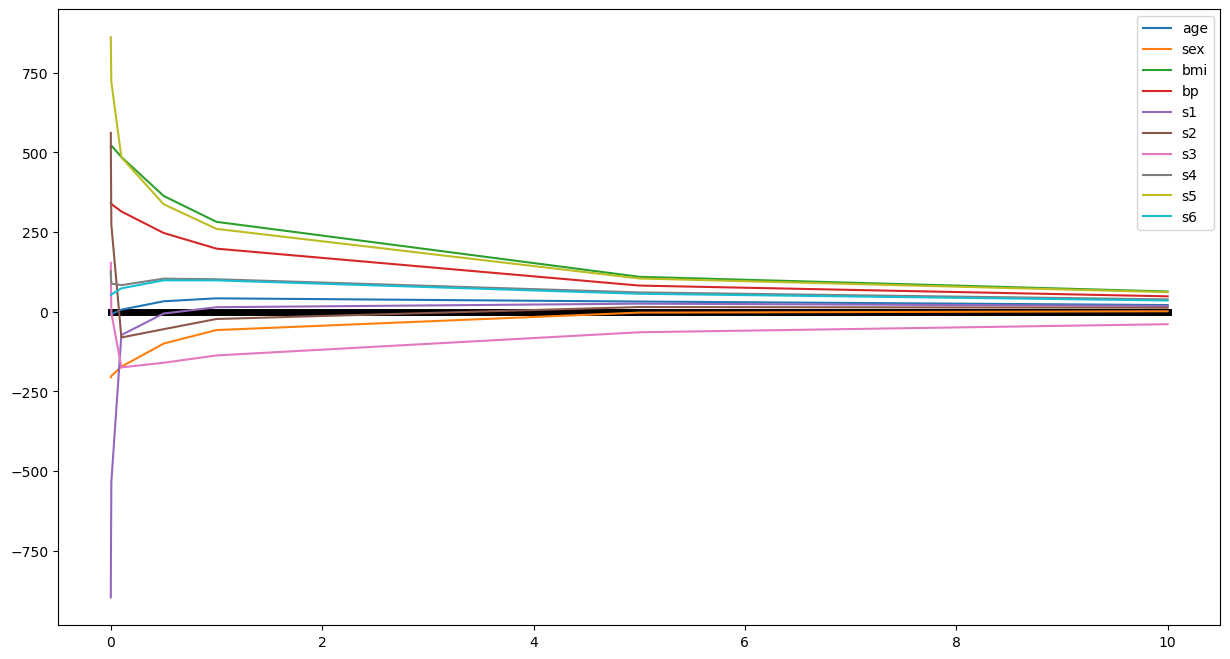

In [57]:
plt.figure(figsize=(15,8))
plt.plot(alphas,np.zeros(len(alphas)),color='black',linewidth=5)
for i in range(input_array.shape[0]):
    plt.plot(alphas,input_array[i],label=data.feature_names[i])
plt.legend()

## 3. Impact on Bais and Variance
## If Bias decreases then overfit and variance increases
## If Bias increases then underfit and variance decreases

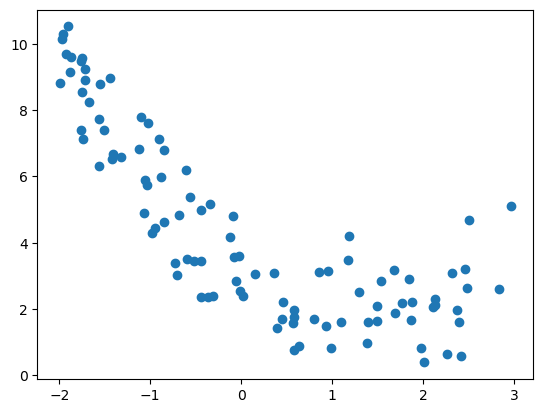

In [58]:
m = 100
X = 5 * np.random.rand(m, 1) - 2
y = 0.7 * X ** 2 - 2 * X + 3 + np.random.randn(m, 1)

plt.scatter(X, y)
plt.show()


In [59]:
X_train,X_test,y_train,y_test = train_test_split(X.reshape(100,1),y.reshape(100),test_size=0.2,random_state=2)
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=15)

X_train = poly.fit_transform(X_train)
X_test = poly.transform(X_test)

In [70]:
! pip install mlxtend

In [71]:
from mlxtend.evaluate import bias_variance_decomp

alphas = np.linspace(0,30,100)

loss = []
bias = []
variance = []

for i in alphas:
    reg = Ridge(alpha=i)
    avg_expected_loss, avg_bias, avg_var = bias_variance_decomp(
        reg, X_train, y_train, X_test, y_test, 
        loss='mse',
        random_seed=123)
    loss.append(avg_expected_loss)
    bias.append(avg_bias)
    variance.append(avg_var)

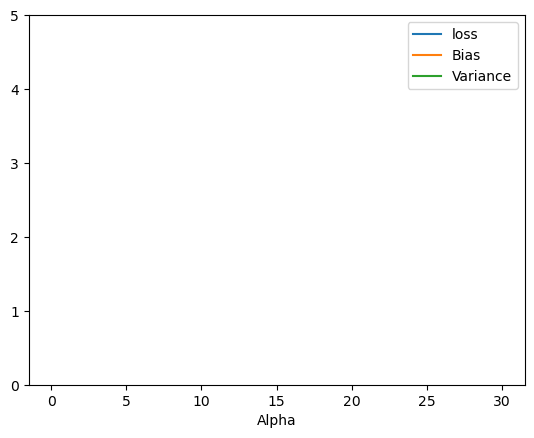

In [67]:
plt.plot(alphas,loss,label='loss')
plt.plot(alphas,bias,label='Bias')
plt.plot(alphas,variance,label='Variance')
plt.ylim(0,5)
plt.xlabel('Alpha')
plt.legend()

## 4. Effect of Regularization on Loss Function

[27.82809103]
-2.29474455867698


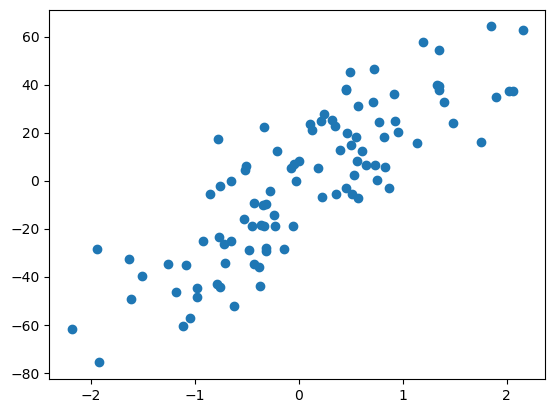

In [72]:
from sklearn.datasets import make_regression

X,y = make_regression(n_samples=100, n_features=1, n_informative=1, n_targets=1,noise=20,random_state=13)

plt.scatter(X,y)

from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(X,y)
print(reg.coef_)
print(reg.intercept_)

In [73]:
def cal_loss(m,alpha):
    return np.sum((y - m*X.ravel() + 2.29)**2) + alpha*m*m
def predict(m):
    return m*X - 2.29

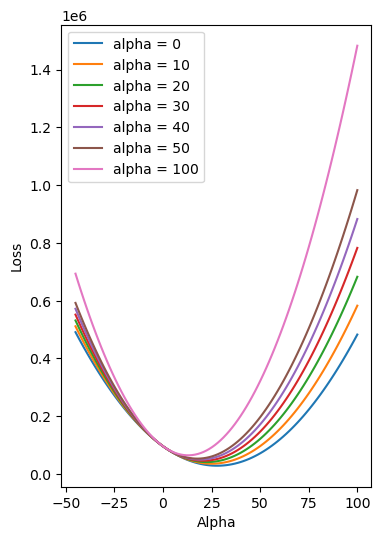

In [74]:
m = np.linspace(-45,100,100)
plt.figure(figsize=(4,6))
for j in [0,10,20,30,40,50,100]:
    loss = []
    for i in range(m.shape[0]):
        loss_i = cal_loss(m[i],j)
        loss.append(loss_i)
    plt.plot(m,loss,label='alpha = {}'.format(j))
plt.legend()
plt.xlabel('Alpha')
plt.ylabel('Loss')
plt.show()

## Why is it called Ridge?

## Ridge regression is called "ridge" because it introduces a regularization term that resembles a ridge in the parameter space.

## In ridge regression, the ordinary least squares (OLS) method is modified by adding a regularization term to the loss function. The regularization term penalizes large coefficients and helps to reduce the impact of multicollinearity (high correlation among predictors) in the data.

## The regularization term in ridge regression is the L2 norm (squared Euclidean norm) of the coefficient vector multiplied by a constant, often denoted as lambda or alpha. This regularization term is added to the sum of squared errors (SSE) in the OLS loss function.

## The effect of the regularization term is to shrink the coefficients towards zero, but not exactly to zero. The L2 regularization term adds a penalty for large coefficients, effectively constraining their values. This regularization method can help to prevent overfitting in predictive models by reducing the model's complexity and variance.

## The shape of the regularization term, when plotted as a function of the coefficient values, resembles a ridge. The ridge indicates a constraint on the coefficient values, pushing them towards zero without forcing them to be exactly zero. Hence, the method became known as "ridge regression."

## IMPLEMENT LASSO REGRESSION

In [75]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import Lasso
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split

[27.49347787]
-1.4162176647153222


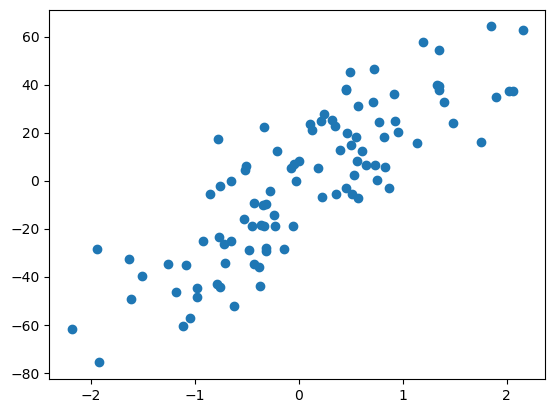

In [76]:
X,y = make_regression(n_samples=100, n_features=1, n_informative=1, n_targets=1,noise=20,random_state=13)

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

plt.scatter(X,y)

from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(X_train,y_train)
print(reg.coef_)
print(reg.intercept_)

C:\Users\muham.LAPTOP-MJ49C84G\AppData\Local\Temp\ipykernel_5096\15920687.py:6: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  L.fit(X_train,y_train)
C:\Users\muham.LAPTOP-MJ49C84G\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\Users\muham.LAPTOP-MJ49C84G\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.196e+04, tolerance: 8.017e+00 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model 

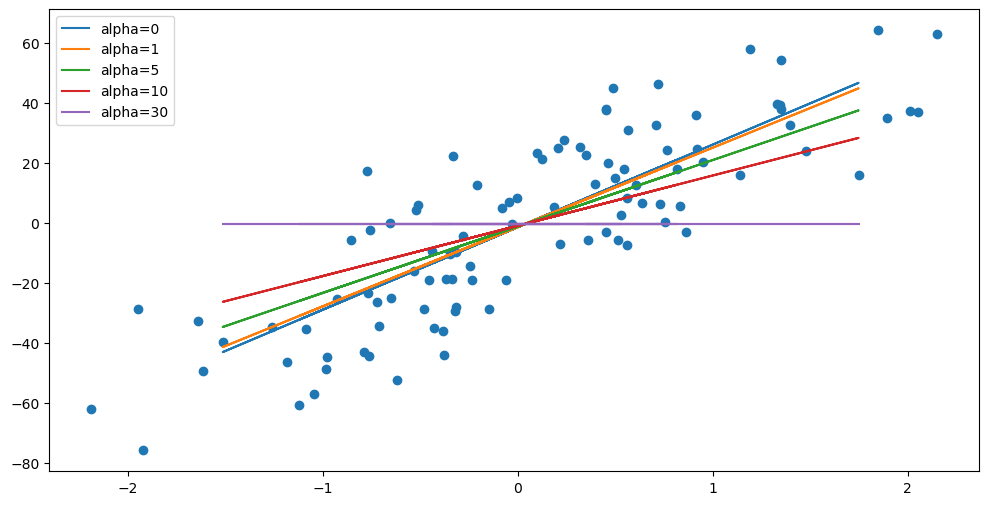

In [77]:
alphas = [0,1,5,10,30]
plt.figure(figsize=(12,6))
plt.scatter(X,y)
for i in alphas:
    L = Lasso(alpha=i)
    L.fit(X_train,y_train)
    plt.plot(X_test,L.predict(X_test),label='alpha={}'.format(i))
plt.legend()
plt.show()

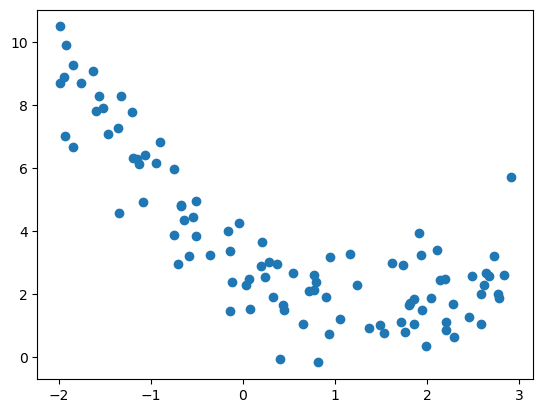

In [78]:
m = 100
x1 = 5 * np.random.rand(m, 1) - 2
x2 = 0.7 * x1 ** 2 - 2 * x1 + 3 + np.random.randn(m, 1)

plt.scatter(x1, x2)
plt.show()

C:\Users\muham.LAPTOP-MJ49C84G\anaconda3\lib\site-packages\sklearn\pipeline.py:405: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
C:\Users\muham.LAPTOP-MJ49C84G\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\Users\muham.LAPTOP-MJ49C84G\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.469e+01, tolerance: 6.530e-02 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear

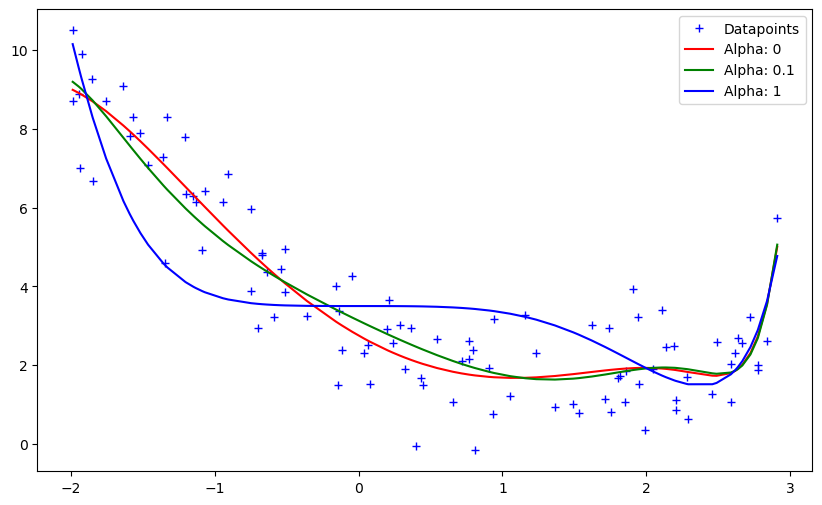

In [79]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge

def get_preds_lasso(x1, x2, alpha):
    model = Pipeline([
        ('poly_feats', PolynomialFeatures(degree=16)),
        ('lasso', Lasso(alpha=alpha))
    ])
    model.fit(x1, x2)
    return model.predict(x1)

alphas = [0, 0.1, 1]
cs = ['r', 'g', 'b']

plt.figure(figsize=(10, 6))
plt.plot(x1, x2, 'b+', label='Datapoints')

for alpha, c in zip(alphas, cs):
    preds = get_preds_lasso(x1, x2, alpha)
    # Plot
    plt.plot(sorted(x1[:, 0]), preds[np.argsort(x1[:, 0])], c, label='Alpha: {}'.format(alpha))

plt.legend()
plt.show()

In [80]:
# Lasso for higher values of lambda performs feature selection

#  key understanding -Lasso 
## 1. How are coefficients effected?
## If alpha zero then linear Regression. As alpha increase some coefficients that are important also increase while unimportant decreases

In [81]:
from sklearn.datasets import load_diabetes

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score

from sklearn.model_selection import train_test_split

In [82]:
data = load_diabetes()

df = pd.DataFrame(data.data,columns=data.feature_names)
df['TARGET'] = data.target

df.head()

age       sex       bmi        bp        s1        s2        s3  \
0  0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1 -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2  0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356   
3 -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4  0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   

         s4        s5        s6  TARGET  
0 -0.002592  0.019907 -0.017646   151.0  
1 -0.039493 -0.068332 -0.092204    75.0  
2 -0.002592  0.002861 -0.025930   141.0  
3  0.034309  0.022688 -0.009362   206.0  
4 -0.002592 -0.031988 -0.046641   135.0

In [83]:
X_train,X_test,y_train,y_test = train_test_split(data.data,data.target,test_size=0.2,random_state=2)

In [84]:
coefs = []
r2_scores = []

for i in [0,0.1,1,10]:
    reg = Lasso(alpha=i)
    reg.fit(X_train,y_train)
    
    coefs.append(reg.coef_.tolist())
    y_pred = reg.predict(X_test)
    r2_scores.append(r2_score(y_test,y_pred))

C:\Users\muham.LAPTOP-MJ49C84G\AppData\Local\Temp\ipykernel_5096\2282175565.py:6: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  reg.fit(X_train,y_train)
C:\Users\muham.LAPTOP-MJ49C84G\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\Users\muham.LAPTOP-MJ49C84G\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.967e+05, tolerance: 2.124e+02 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  mo

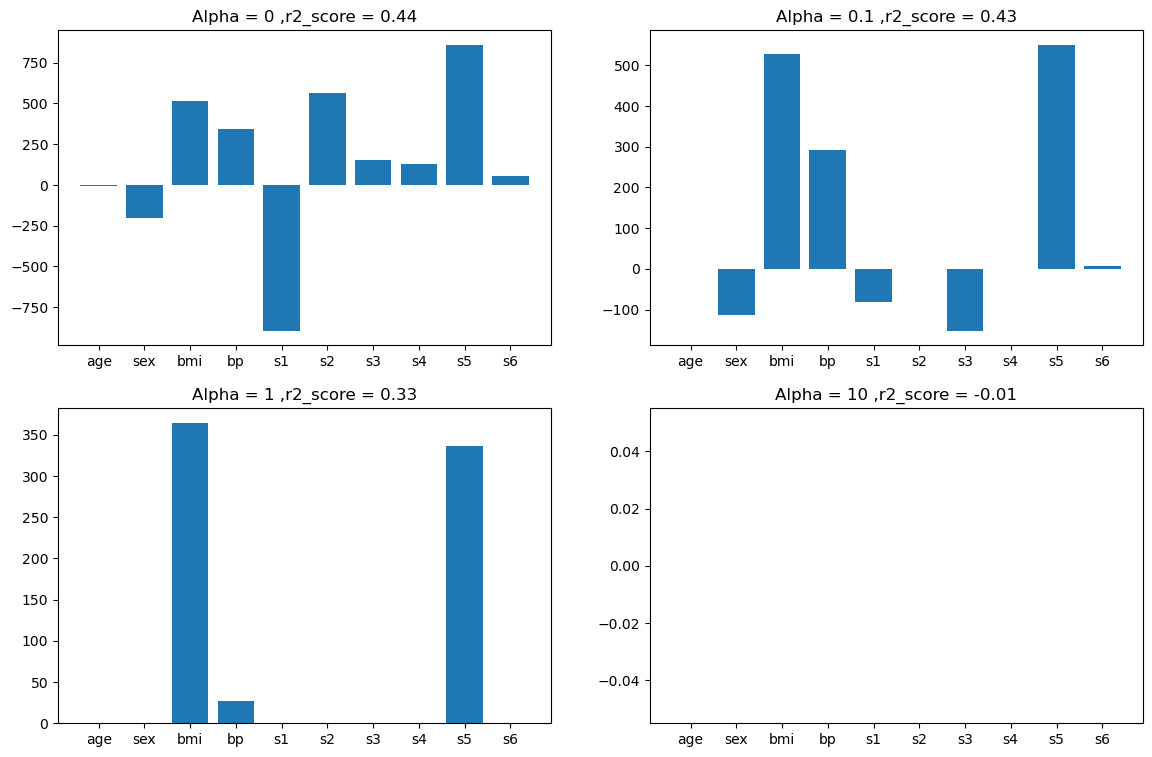

In [85]:
plt.figure(figsize=(14,9))
plt.subplot(221)
plt.bar(data.feature_names,coefs[0])
plt.title('Alpha = 0 ,r2_score = {}'.format(round(r2_scores[0],2)))

plt.subplot(222)
plt.bar(data.feature_names,coefs[1])
plt.title('Alpha = 0.1 ,r2_score = {}'.format(round(r2_scores[1],2)))

plt.subplot(223)
plt.bar(data.feature_names,coefs[2])
plt.title('Alpha = 1 ,r2_score = {}'.format(round(r2_scores[2],2)))

plt.subplot(224)
plt.bar(data.feature_names,coefs[3])
plt.title('Alpha = 10 ,r2_score = {}'.format(round(r2_scores[3],2)))

plt.show()

## Higher the coefficients are more effected

In [86]:
alphas = [0,0.0001,0.001,0.01,0.1,1,10,100,1000,10000]

coefs = []

for i in alphas:
    reg = Lasso(alpha=i)
    reg.fit(X_train,y_train)
    
    coefs.append(reg.coef_.tolist())

C:\Users\muham.LAPTOP-MJ49C84G\AppData\Local\Temp\ipykernel_5096\3629677300.py:7: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  reg.fit(X_train,y_train)
C:\Users\muham.LAPTOP-MJ49C84G\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\Users\muham.LAPTOP-MJ49C84G\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.967e+05, tolerance: 2.124e+02 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  mo

In [87]:
input_array = np.array(coefs)

coef_df = pd.DataFrame(input_array,columns=data.feature_names)
coef_df['alpha'] = alphas
coef_df.set_index('alpha')

age         sex         bmi          bp          s1  \
alpha                                                                  
0.0000     -9.158653 -205.454322  516.693745  340.619999 -895.551989   
0.0001     -9.069064 -205.329406  516.789418  340.532379 -888.660904   
0.0010     -8.262770 -204.205364  517.650073  339.743901 -826.663603   
0.0100     -1.359721 -192.937180  526.356514  332.641101 -430.226975   
0.1000      0.000000 -113.969928  526.744396  292.628472  -82.693681   
1.0000      0.000000    0.000000  363.885742   27.273163    0.000000   
10.0000     0.000000    0.000000    0.000000    0.000000    0.000000   
100.0000    0.000000    0.000000    0.000000    0.000000    0.000000   
1000.0000   0.000000    0.000000    0.000000    0.000000    0.000000   
10000.0000  0.000000    0.000000    0.000000    0.000000    0.000000   

                    s2          s3          s4          s5         s6  
alpha                                                                  
0.0000      561.220669  153.893104  126.731395  861.126997  52.421122  
0.0001      555.958584  150.593655  125.450143  858.645541  52.380294  
0.0010      508.617395  120.908607  113.921773  836.320753  52.012849  
0.0100      191.295480  -44.034913   68.988987  688.396028  47.940616  
0.1000       -0.000000 -152.685338    0.000000  551.080291   7.170992  
1.0000        0.000000   -0.000000    0.000000  336.137262   0.000000  
10.0000       0.000000   -0.000000    0.000000    0.000000   0.000000  
100.0000      0.000000   -0.000000    0.000000    0.000000   0.000000  
1000.0000     0.000000   -0.000000    0.000000    0.000000   0.000000  
10000.0000    0.000000   -0.000000    0.000000    0.000000   0.000000

In [88]:
alphas = [0,0.0001,0.0005,0.001,0.005,0.1,0.5,1,5,10]

coefs = []

for i in alphas:
    reg = Lasso(alpha=i)
    reg.fit(X_train,y_train)
    
    coefs.append(reg.coef_.tolist())

C:\Users\muham.LAPTOP-MJ49C84G\AppData\Local\Temp\ipykernel_5096\2481455600.py:7: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  reg.fit(X_train,y_train)
C:\Users\muham.LAPTOP-MJ49C84G\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\Users\muham.LAPTOP-MJ49C84G\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.967e+05, tolerance: 2.124e+02 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  mo

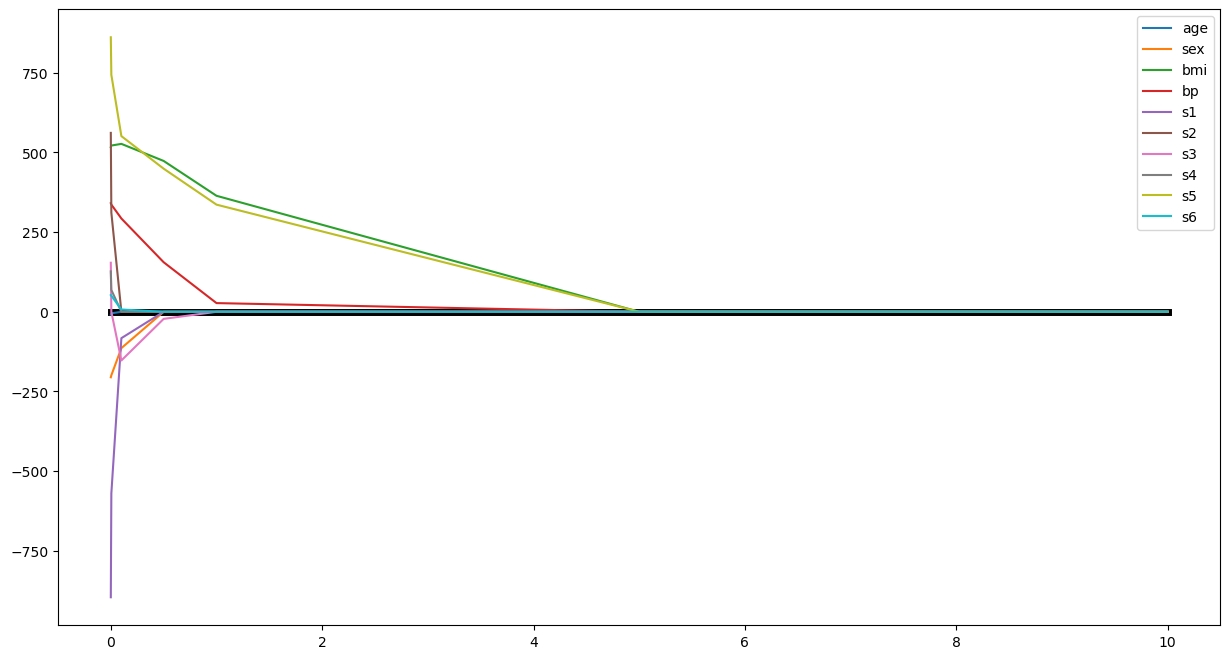

In [89]:
input_array = np.array(coefs).T

plt.figure(figsize=(15,8))
plt.plot(alphas,np.zeros(len(alphas)),color='black',linewidth=5)
for i in range(input_array.shape[0]):
    plt.plot(alphas,input_array[i],label=data.feature_names[i])
plt.legend()

## 3. Impact in Bias and Variance
## Asalpha increases overfitting decreases, bias increases and variance decreses

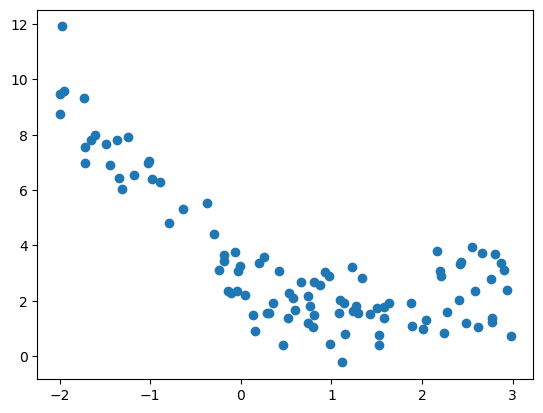

In [100]:
m = 100
X = 5 * np.random.rand(m, 1) - 2
y = 0.7 * X ** 2 - 2 * X + 3 + np.random.randn(m, 1)

plt.scatter(X, y)
plt.show()

In [101]:
X_train,X_test,y_train,y_test = train_test_split(X.reshape(100,1),y.reshape(100),test_size=0.2,random_state=2)

In [102]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=10)

X_train = poly.fit_transform(X_train)
X_test = poly.transform(X_test)

In [104]:
from mlxtend.evaluate import bias_variance_decomp

alphas = np.linspace(0,30,100)

loss = []
bias = []
variance = []

for i in alphas:
    reg = Lasso(alpha=i)
    avg_expected_loss, avg_bias, avg_var = bias_variance_decomp(
        reg, X_train, y_train, X_test, y_test, 
        loss='mse',
        random_seed=123)
    loss.append(avg_expected_loss)
    bias.append(avg_bias)
    variance.append(avg_var)

C:\Users\muham.LAPTOP-MJ49C84G\anaconda3\lib\site-packages\mlxtend\evaluate\bias_variance_decomp.py:130: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  pred = estimator.fit(X_boot, y_boot, **fit_params).predict(X_test)
C:\Users\muham.LAPTOP-MJ49C84G\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\Users\muham.LAPTOP-MJ49C84G\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.992e+01, tolerance: 4.808e-02 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solver

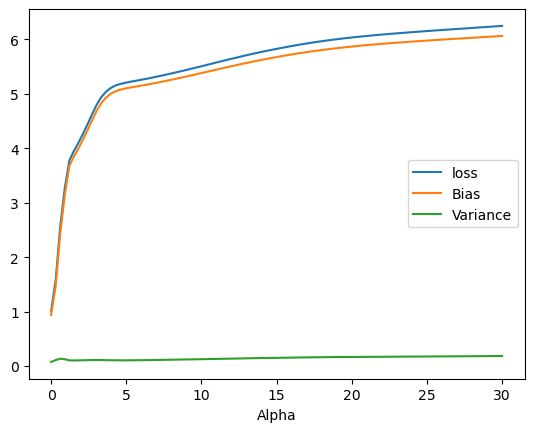

In [105]:
plt.plot(alphas,loss,label='loss')
plt.plot(alphas,bias,label='Bias')
plt.plot(alphas,variance,label='Variance')
plt.xlabel('Alpha')
plt.legend()

## 4. Effect of Regularization on Loss Function  

[27.82809103]
-2.29474455867698


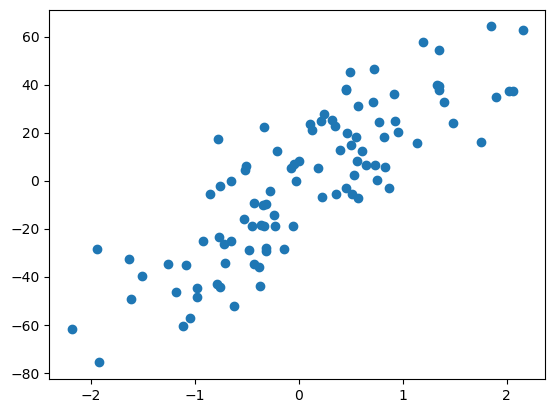

In [95]:
from sklearn.datasets import make_regression

X,y = make_regression(n_samples=100, n_features=1, n_informative=1, n_targets=1,noise=20,random_state=13)

plt.scatter(X,y)

from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(X,y)
print(reg.coef_)
print(reg.intercept_)

In [96]:
def predict(m):
    return m*X - 2.29

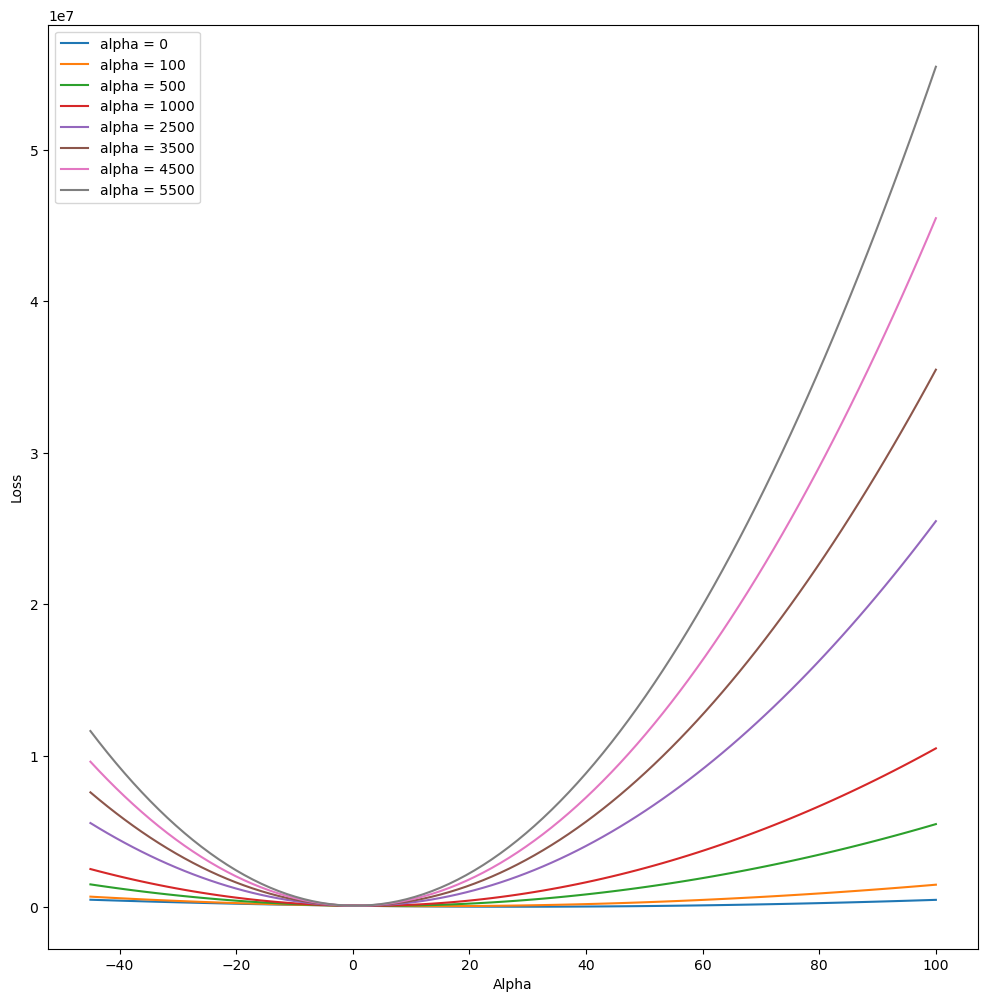

In [97]:
m = np.linspace(-45,100,100)
plt.figure(figsize=(12,12))
for j in [0,100,500,1000,2500,3500,4500,5500]:
    loss = []
    for i in range(m.shape[0]):
        loss_i = cal_loss(m[i],j)
        loss.append(loss_i)
    plt.plot(m,loss,label='alpha = {}'.format(j))
plt.legend()
plt.xlabel('Alpha')
plt.ylabel('Loss')
plt.show()

## ElasticNet Regression
## It is a combination of Ridge and Lasso Regression. If data is so big such that we do not understand if to use Lass or Ridge so we use Elastnet Regression.It is designed to address some of the limitations of each individual method.

## In ElasticNet regression, the loss function includes both the L1 and L2 regularization terms. The L1 regularization term encourages sparsity by pushing some of the coefficients to exactly zero, effectively performing feature selection. The L2 regularization term helps to overcome the limitations of L1 regularization by providing a smoothness constraint and dealing with multicollinearity.

## The ElasticNet regression model introduces two hyperparameters: alpha and the mixing ratio, often denoted as "l1_ratio." The alpha parameter controls the overall strength of the regularization, with higher values leading to stronger regularization. The l1_ratio parameter determines the balance between the L1 and L2 regularization terms. When l1_ratio is set to 1, ElasticNet becomes equivalent to Lasso regression, and when it is set to 0, it becomes equivalent to Ridge regression. Intermediate values of l1_ratio allow for a combination of both L1 and L2 regularization.

## The combination of L1 and L2 regularization in ElasticNet provides a flexible approach to handle situations where there are many correlated predictors and a subset of them is expected to be important for predicting the target variable.

## The ElasticNet regression formula combines the ordinary least squares (OLS) loss function with both L1 and L2 regularization terms. The formula can be written as:

## minimize: (1/2) * RSS + alpha * (l1_ratio * ||w||_1 + 0.5 * (1 - l1_ratio) * ||w||_2^2)

## where:
## (1/2) * RSS represents the OLS loss function, which is the sum of squared errors between the predicted values and the actual target values.
## alpha is the regularization parameter that controls the overall strength of the regularization. Higher values of alpha result in stronger regularization.
## l1_ratio is the mixing ratio parameter that determines the balance between the L1 and L2 regularization terms. It takes values between 0 and 1, where 0 represents Ridge regression and 1 represents Lasso regression.
## w is the vector of coefficients or weights associated with each feature in the regression model.
## ||w||_1 represents the L1 norm of the coefficient vector, which is the sum of the absolute values of the coefficients.
## ||w||_2^2 represents the squared L2 norm of the coefficient vector, which is the sum of the squared values of the coefficients.

In [106]:
from sklearn.datasets import load_diabetes
from sklearn.linear_model import LinearRegression,Ridge,Lasso,ElasticNet
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
X,y = load_diabetes(return_X_y=True)

In [107]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)


In [108]:
# Linear Regression
reg = LinearRegression()
reg.fit(X_train,y_train)
y_pred = reg.predict(X_test)
r2_score(y_test,y_pred)

0.4399338661568968

In [109]:
# Ridge 
reg = Ridge(alpha=0.1)
reg.fit(X_train,y_train)
y_pred = reg.predict(X_test)
r2_score(y_test,y_pred)


0.4519949419719548

In [110]:
# Lasso
reg = Lasso(alpha=0.01)
reg.fit(X_train,y_train)
y_pred = reg.predict(X_test)
r2_score(y_test,y_pred)

0.44111855963110624

In [111]:
# ElasticNet
reg = ElasticNet(alpha=0.005,l1_ratio=0.9)
reg.fit(X_train,y_train)
y_pred = reg.predict(X_test)
r2_score(y_test,y_pred)

0.4531474541554822